In [11]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Loading Data

### Commented out Examples

In [12]:
#######  Remove this code ########
##load data examples
# Load the Iris dataset
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target

#X = pd.DataFrame(X)
#y = pd.DataFrame(y)

#######  Remove this code ########
# Load the dataset (replace 'your_dataset.csv' with your actual dataset)
# data = pd.read_csv('your_dataset.csv')

##alternatively
# Assume 'target' is the column you want to predict
#X = data.drop('target', axis=1)
#y = data['target']

### Actual Load

In [13]:
# Loading dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)
display(data)  ## --> This is a prettier version that print to view dataframes
target_var = 'Survived'
type_of_model = 'Boolean'

X = data.drop(columns=[target_var])
y = data[target_var]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Cleansing

### Null Variable Checks

In [14]:
### Check to Identify which columns have null values
missing_values = data.isnull().sum()

missing_columns = missing_values[missing_values > 0].index.tolist()
print(f"Columns with missing values: {', '.join(missing_columns)}")

Columns with missing values: Age, Cabin, Embarked


### Impute for Missing Data

In [25]:
##impute missing values
# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Impute numerical features with median
numerical_imputer = SimpleImputer(strategy='median')
X[numerical_features] = numerical_imputer.fit_transform(X[numerical_features])

# Impute categorical features with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_features] = categorical_imputer.fit_transform(X[categorical_features])

# Check for remaining missing values after imputation
missing_values_after = X.isnull().sum()
na_values_after = X.isna().sum()
print(f"Missing values after imputation:\n{missing_values_after}")
print(f"\nNaN values after imputation:\n{missing_values_after}")
# Display the first few rows of the imputed dataset
print("\nImputed dataset:")
display(X)



Missing values after imputation:
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

NaN values after imputation:
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Imputed dataset:


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1.0,3.0,male,22.0,1.0,0.0,7.2500,B96 B98,S
1,2.0,1.0,female,38.0,1.0,0.0,71.2833,C85,C
2,3.0,3.0,female,26.0,0.0,0.0,7.9250,B96 B98,S
3,4.0,1.0,female,35.0,1.0,0.0,53.1000,C123,S
4,5.0,3.0,male,35.0,0.0,0.0,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...
886,887.0,2.0,male,27.0,0.0,0.0,13.0000,B96 B98,S
887,888.0,1.0,female,19.0,0.0,0.0,30.0000,B42,S
888,889.0,3.0,female,28.0,1.0,2.0,23.4500,B96 B98,S
889,890.0,1.0,male,26.0,0.0,0.0,30.0000,C148,C


### Distribution Plots for Sanity

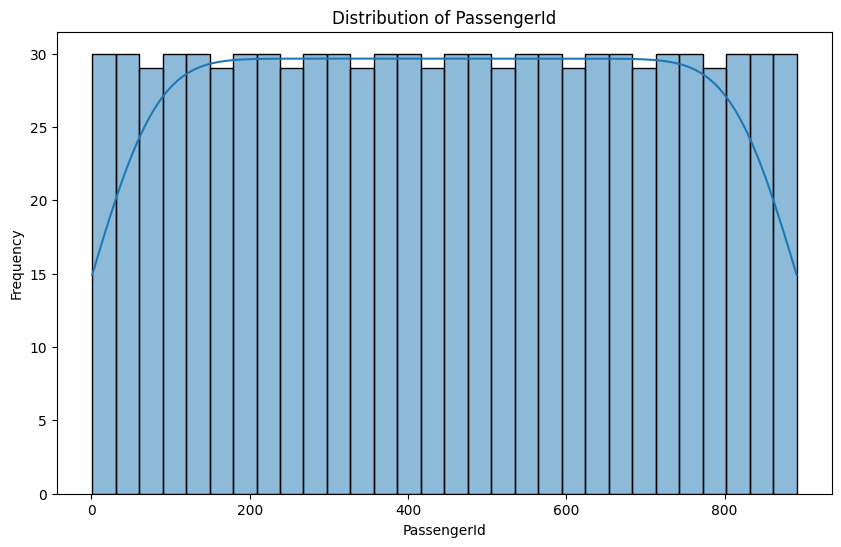

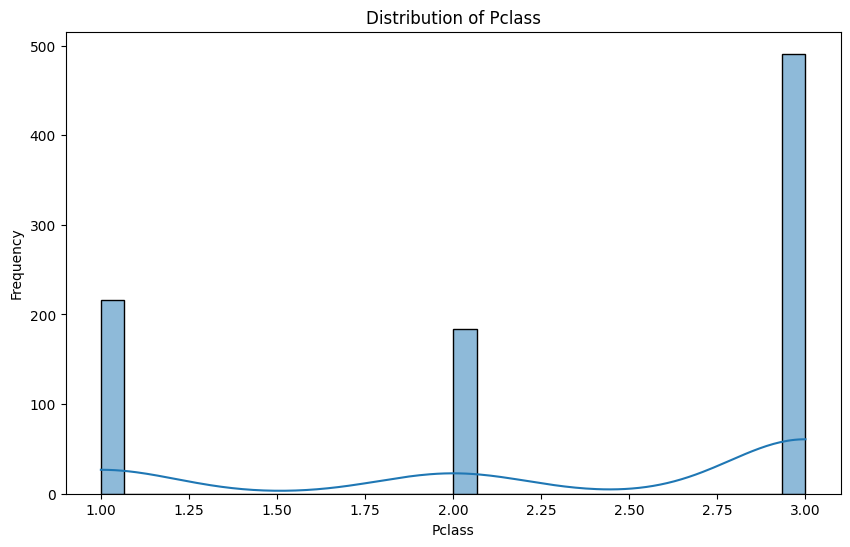

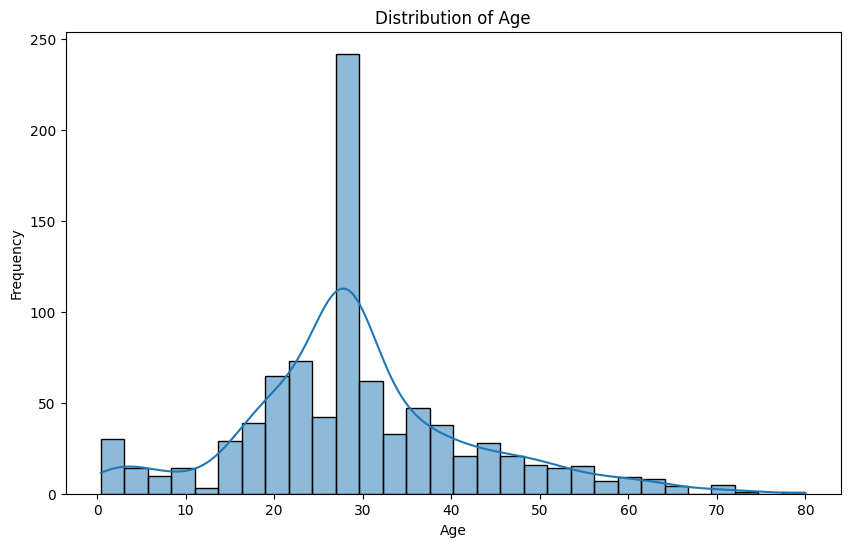

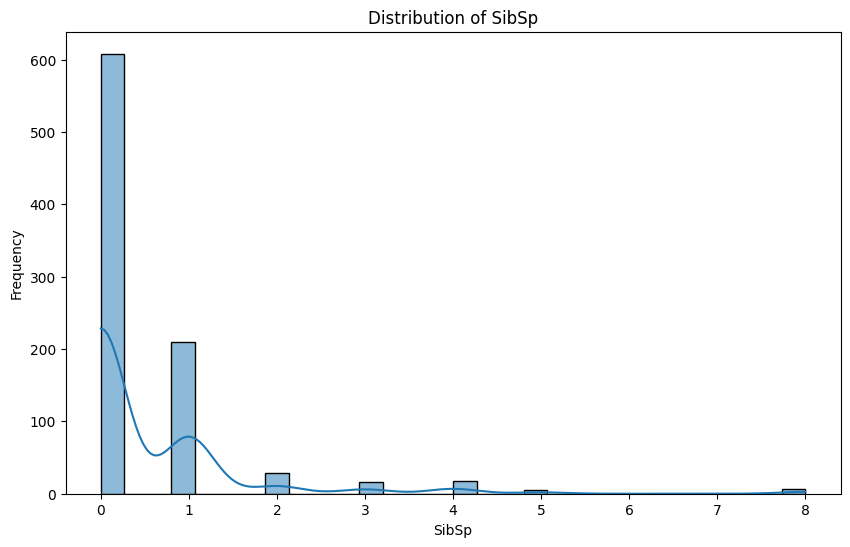

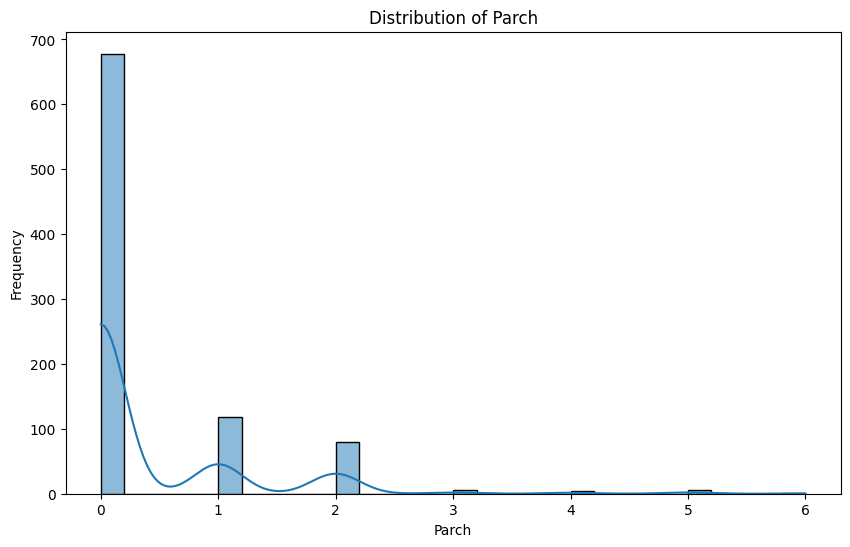

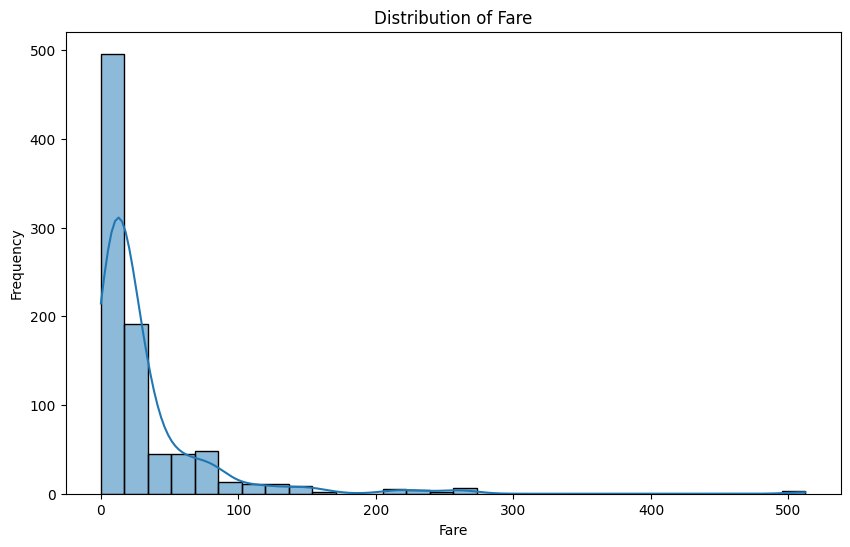

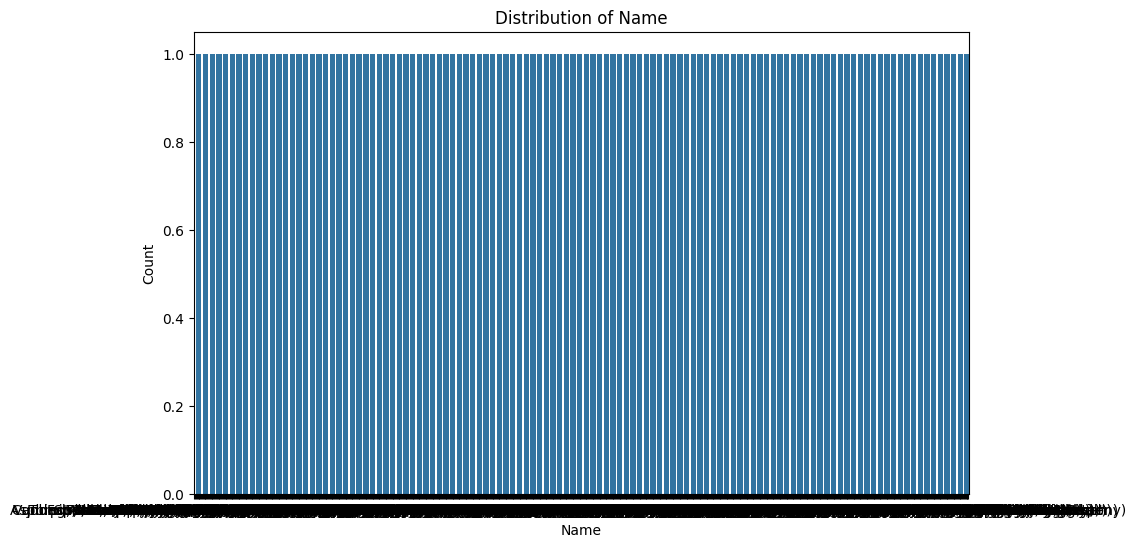

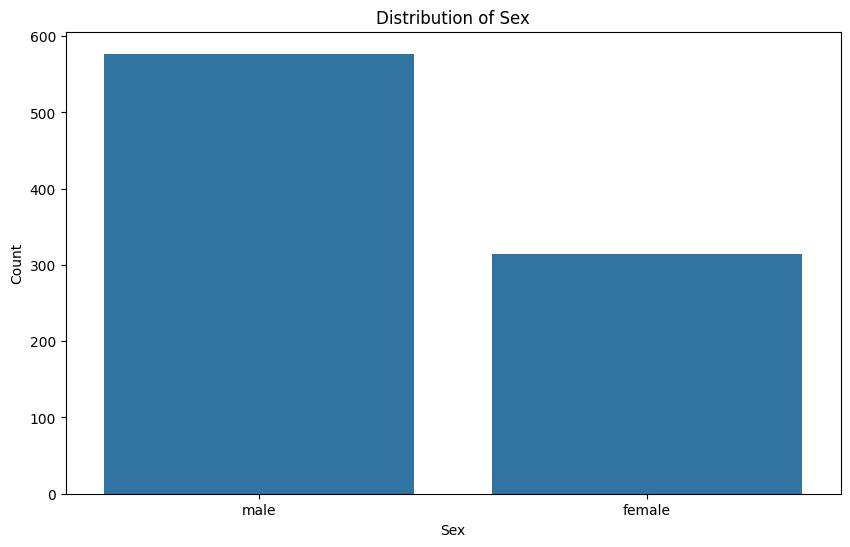

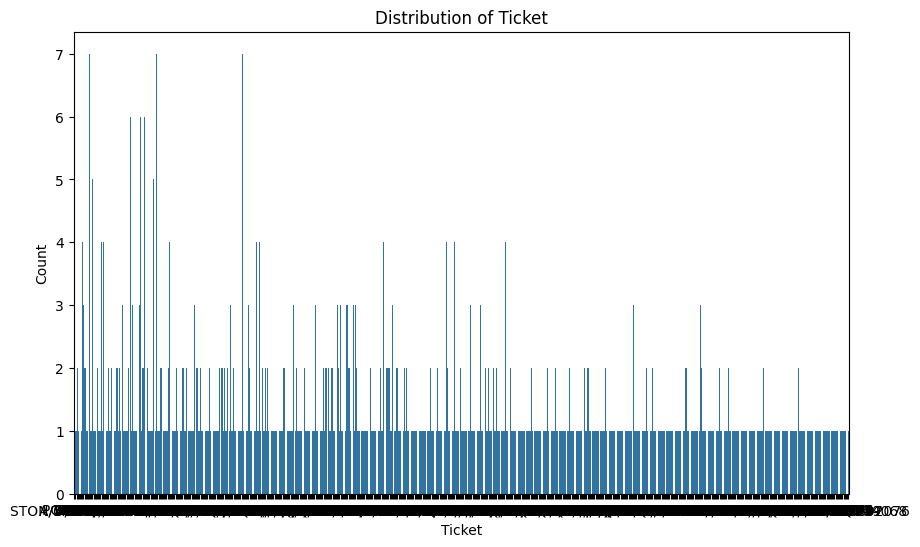

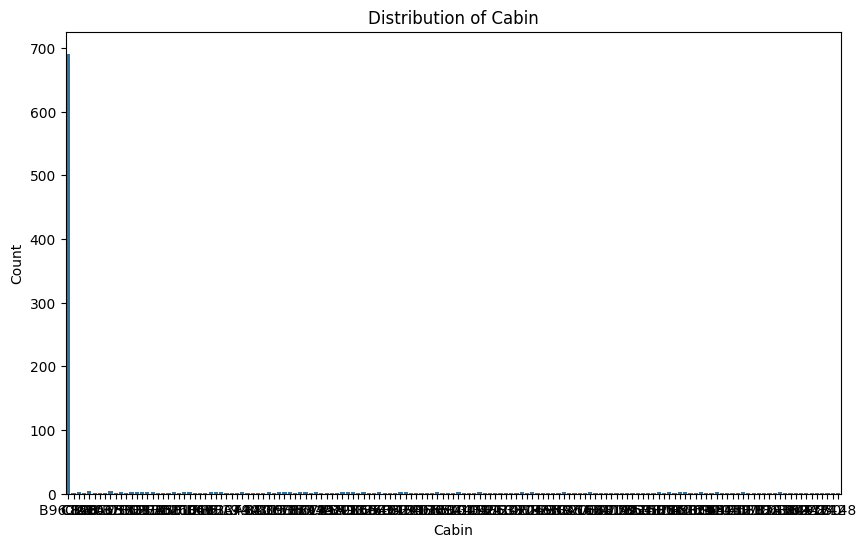

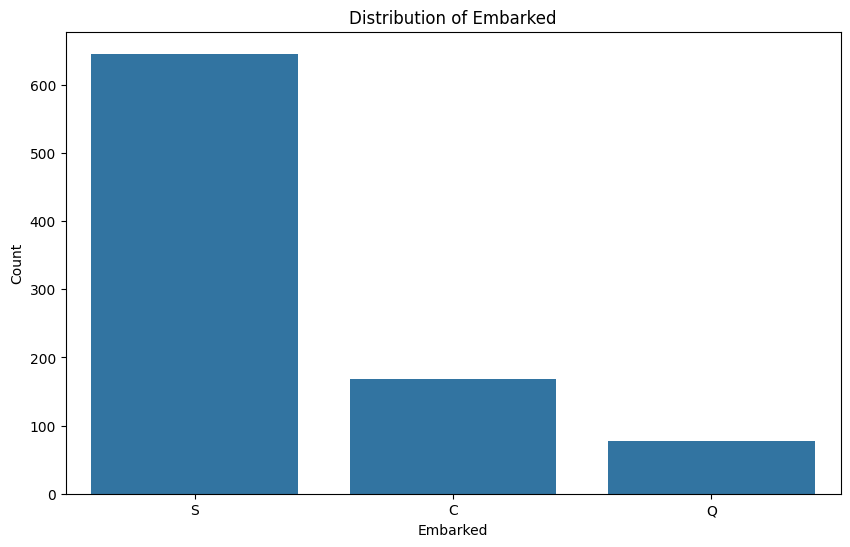

In [16]:
#plot distributions
 # Plot distributions of numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(X[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Plot distributions of categorical features
categorical_features = X.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=X[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


### Remove Unique Identifiers

In [17]:
##drop any fields like name and ticket number that are unique identifiers
X = X.drop(columns=['Name', 'Ticket'])
print(X.head())

   PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare    Cabin Embarked
0          1.0     3.0    male  22.0    1.0    0.0   7.2500  B96 B98        S
1          2.0     1.0  female  38.0    1.0    0.0  71.2833      C85        C
2          3.0     3.0  female  26.0    0.0    0.0   7.9250  B96 B98        S
3          4.0     1.0  female  35.0    1.0    0.0  53.1000     C123        S
4          5.0     3.0    male  35.0    0.0    0.0   8.0500  B96 B98        S


### Standardizing Data for Model

In [18]:
##standardizing the data for the model

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Convert the result to a DataFrame for easy viewing (optional)
X_preprocessed_df = pd.DataFrame(X_preprocessed.toarray() if hasattr(X_preprocessed, "toarray") else X_preprocessed)

# Display the preprocessed features
print("\nPreprocessed features:\n", X_preprocessed_df.head())





Preprocessed features:
         0         1         2         3         4         5    6    7    8    \
0 -1.730108  0.827377 -0.565736  0.432793 -0.473674 -0.502445  0.0  1.0  0.0   
1 -1.726220 -1.566107  0.663861  0.432793 -0.473674  0.786845  1.0  0.0  0.0   
2 -1.722332  0.827377 -0.258337 -0.474545 -0.473674 -0.488854  1.0  0.0  0.0   
3 -1.718444 -1.566107  0.433312  0.432793 -0.473674  0.420730  1.0  0.0  0.0   
4 -1.714556  0.827377  0.433312 -0.474545 -0.473674 -0.486337  0.0  1.0  0.0   

   9    ...  148  149  150  151  152  153  154  155  156  157  
0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
1  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
2  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
3  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
4  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  

[5 rows x 158 columns]


# Split Data for Test/Train 

In [19]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y, test_size=0.2, random_state=42)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)



Training set shape: (712, 158)
Test set shape: (179, 158)


# Modeling Evaluation

In [ ]:
## model evaluation
#Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB()
}

# Function to evaluate a model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    ## TODO:  Should incorporate hyper-tuning here
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Compare models
results = {}
for model_name, model in models.items():
    accuracy = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[model_name] = accuracy
    print(f"{model_name}: {accuracy:.2f}")

# Show comparison results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print("\nModel Comparison:\n", results_df.sort_values('Accuracy', ascending=False))

Logistic Regression: 0.80
K-Nearest Neighbors: 0.80
Random Forest: 0.82
Support Vector Machine: 0.82
Naive Bayes: 0.62

Model Comparison:
                     Model  Accuracy
2           Random Forest  0.815642
3  Support Vector Machine  0.815642
0     Logistic Regression  0.798883
1     K-Nearest Neighbors  0.798883
4             Naive Bayes  0.620112


# One Off Examples for Other Usage

In [ ]:
##alternatively run 1 model

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))